# Shape Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Open files

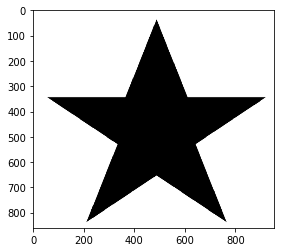

In [19]:
template = cv2.imread("DATA/black_star.png", 0)
plt.imshow(template, cmap = 'gray')

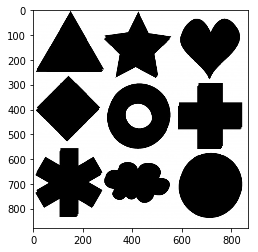

In [25]:
target = cv2.imread("DATA/black_shapes.png")
target_rgb = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
target = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
plt.imshow(target, cmap = 'gray')

## Threshold on both images

In [21]:
ret, thresh1 = cv2.threshold(template, 127,255,0)
ret, thresh2 = cv2.threshold(target, 127,255,0)

## Find contour on template and target image

In [31]:
image, contour, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# sort the contour by area so we remove the largest area which is the image outline
sorted_contour = sorted(contour, key = cv2.contourArea, reverse = True)

# extract second largest contour which is our template image
template_contour = sorted_contour[1]

image, contour, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

## Loop through our target image

In [38]:
for c in contour:
    # use cv2.matchShapes to compare contour shape (lower means close match)
    # parameter : 
    #   method - type of contour matching (1,2,3)
    #   method parameter : leave alone 0.0
    match = cv2.matchShapes(template_contour, c, 1, 0.0)
    print(match)
    if match < 0.15:
        closest_contour = c
    else:
        continue

0.29897021932744605
0.2162451743454692
0.4057103998365732
0.25397055191248197
0.1857066977914399
0.2544061612093381
0.1719824098295899
0.2297409746165912
0.3691342305906936
0.13335130598345027
0.3086006085075671


## Draw closest contour on original image

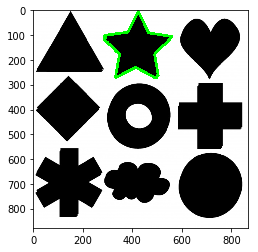

In [39]:
# in our example, only one image matches, if multiple matches are found we can get the minimum match value
cv2.drawContours(target_rgb, [closest_contour], -1, (0,255,0), 10)
plt.imshow(target_rgb)